In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ushape.csv')

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [8]:
df = df.rename(columns={'3.159499363321345566e-02': 'x', '9.869877579082642072e-01': 'y', '0.000000000000000000e+00': 'class'})

In [9]:
df

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [10]:
df = df.dropna()

In [11]:
df.shape

(99, 3)

In [12]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

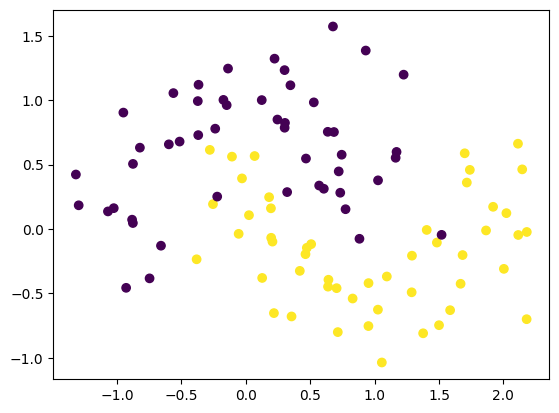

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [15]:
clf.fit(x, y)

LogisticRegression()

<Axes: >

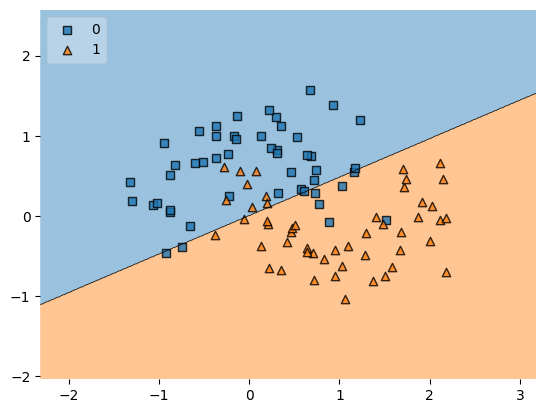

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf=clf, legend=2)

In [17]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, x, y, cv=10))

0.8300000000000001

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
x_trf = poly.fit_transform(x)

In [23]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1, x_trf, y, cv=10))

0.9099999999999999

In [25]:
def plot_decision_boundary(x, y, degree = 1):

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_trf = poly.fit_transform(x)

    clf = LogisticRegression()
    clf.fit(x_trf, y)

    accuracy = np.mean(cross_val_score(clf, x_trf, y, cv=10))

    a = np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01)
    b = np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01)

    xx, yy = np.meshgrid(a, b)

    input_array = np.array([xx.ravel(), yy.ravel()]).T

    labels = clf.predict(poly.fit_transform(input_array))

    plt.contourf(xx, yy, labels.reshape(xx.shape), alpha=0.5)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.title('degree = {}, accuracy = {}'.format(degree, accuracy))

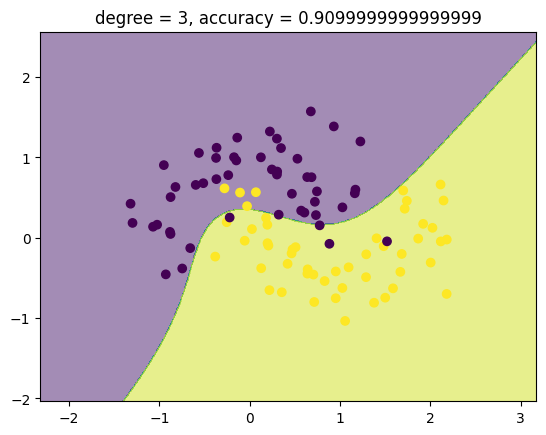

In [31]:
plot_decision_boundary(x, y, 3)

2025-01-25 18:24:14.362 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 18:24:14.488 
  command:

    streamlit run c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-25 18:24:14.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 18:24:14.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 18:24:14.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 18:24:14.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 18:24:14.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 18:24:

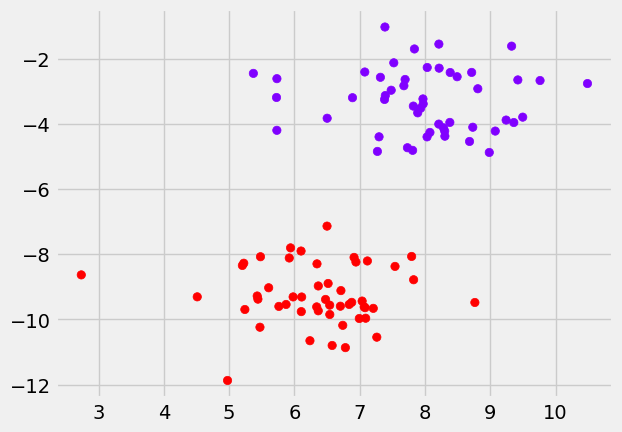

In [38]:
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification,make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def load_initial_graph(dataset,ax):
    if dataset == "Binary":
        X, y = make_blobs(n_features=2, centers=2,random_state=6)
        ax.scatter(X.T[0], X.T[1], c=y, cmap='rainbow')
        return X,y
    elif dataset == "Multiclass":
        X,y = make_blobs(n_features=2, centers=3,random_state=2)
        ax.scatter(X.T[0], X.T[1], c=y, cmap='rainbow')
        return X,y

def draw_meshgrid():
    a = np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01)
    b = np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)

    XX, YY = np.meshgrid(a, b)

    input_array = np.array([XX.ravel(), YY.ravel()]).T

    return XX, YY, input_array


plt.style.use('fivethirtyeight')

st.sidebar.markdown("# Logistic Regression Classifier")

dataset = st.sidebar.selectbox(
    'Select Dataset',
    ('Binary','Multiclass')
)

penalty = st.sidebar.selectbox(
    'Regularization',
    ('l2', 'l1','elasticnet','none')
)

c_input = float(st.sidebar.number_input('C',value=1.0))

solver = st.sidebar.selectbox(
    'Solver',
    ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
)

max_iter = int(st.sidebar.number_input('Max Iterations',value=100))

multi_class = st.sidebar.selectbox(
    'Multi Class',
    ('auto', 'ovr', 'multinomial')
)

l1_ratio = int(st.sidebar.number_input('l1 Ratio'))

# Load initial graph
fig, ax = plt.subplots()

# Plot initial graph
X,y = load_initial_graph(dataset,ax)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
orig = st.pyplot(fig)

if st.sidebar.button('Run Algorithm'):
    orig.empty()

    clf = LogisticRegression(penalty=penalty,C=c_input,solver=solver,max_iter=max_iter,multi_class=multi_class,l1_ratio=l1_ratio)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)

    XX, YY, input_array = draw_meshgrid()
    labels = clf.predict(input_array)

    ax.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5, cmap='rainbow')
    plt.xlabel("Col1")
    plt.ylabel("Col2")
    orig = st.pyplot(fig)
    st.subheader("Accuracy for Decision Tree  " + str(round(accuracy_score(y_test, y_pred), 2)))

In [37]:
!pip install streamlit


  Using cached streamlit-1.41.1-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.1-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyarrow-19.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached narwhals-1.23.0-py3-none-any.whl.metadata (10.0 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
Using cached streamlit-1.41.1-py2.py3-none-any.whl (9.1 MB)
Using cached altair-5.5.0-py3-none-any.whl (731 kB)
Using cached blinker-1.9.0-